In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import matplotlib.patches as patches
%matplotlib inline

In [2]:
text_color = 'black'
mpl.rcParams['font.weight']='bold'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['font.family']='Century Gothic'
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
bgcolor = '#D7E5E5'
from adjustText import adjust_text
from highlight_text import ax_text,fig_text

In [3]:
df = pd.read_csv('../possession.csv', index_col='Rk')

In [4]:
df_neymar = df[df['Player']=='Neymar']
df_neymar['Megsp90'] = df_neymar['Megs']/df_neymar['90s']
df_neymar

<ipython-input-4-7192baf1be69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neymar['Megsp90'] = df_neymar['Megs']/df_neymar['90s']


,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Touches,Def Pen,...,1/3,CPA,Mis,Dis,Targ,Rec,Rec%,Prog.1,Matches,Megsp90
Rk,,,,,,,,,,,,,,,,,,,,,
1885,Neymar,BRA,"MF,FW",Paris S-G,Ligue 1,28,1992,15.7,1337,1,...,72,23,63,68,1290,1107,85.8,183,Matches,1.146497


In [5]:
df = df.drop(df_neymar.index)

In [6]:
df_squad = df.groupby('Squad').sum()
df_squad['Megsp90'] = df_squad['Megs']/38
df_squad = df_squad.reset_index()

In [7]:
df_squad = df_squad[['Squad','Megsp90']].reset_index(drop=True)
#df_squad = pd.concat([df_squad,pd.DataFrame(data = {'Squad': [df_neymar['Player'].iloc[0]], 
#                   'Megsp90': [df_neymar['Megsp90'].iloc[0]]})]).reset_index(drop=True)
df_squad = df_squad.sort_values('Megsp90', ascending=False)[:11]

In [8]:
df_squad

,Squad,Megsp90
68,Paris S-G,1.157895
78,Sassuolo,1.026316
7,Atlético Madrid,1.000000
28,Elche,0.973684
25,Dortmund,0.973684
92,Villarreal,0.947368
63,Napoli,0.947368
44,Leeds United,0.921053
56,Manchester Utd,0.921053
32,Fulham,0.894737


<ipython-input-9-dd4ab86db239>:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


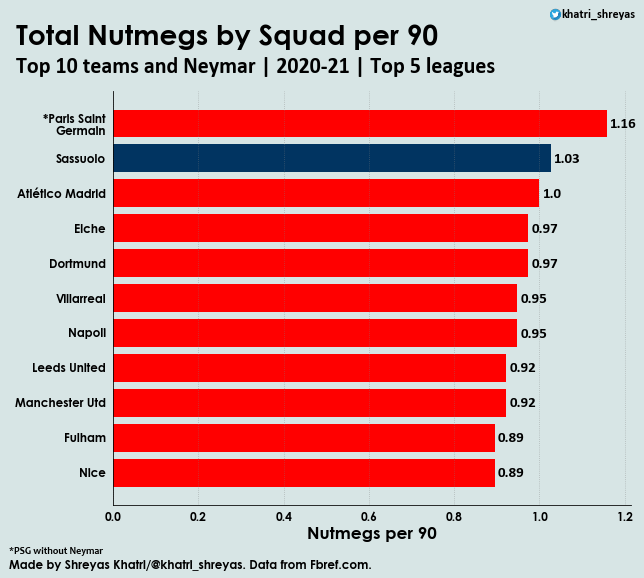

In [9]:
fig, ax = plt.subplots(figsize=(9,8))
fig.set_facecolor(bgcolor)
ax.axis('off')

ax = fig.add_axes([0.18,0.13,0.8,0.72])
ax.patch.set_facecolor(bgcolor)
ax.grid(axis='x',c='grey',ls=':',alpha=0.5,zorder=0)
ax.barh(y=['*Paris Saint\nGermain'] + list(df_squad['Squad'].values[1:]), 
        width = (df_squad['Megsp90']).tolist(), color=['red']+['#013461']+['red']*9,zorder=1)
ax.invert_yaxis()

for s in ['top','right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
#ax.xaxis.set_major_formatter(ticker.PercentFormatter())

for i in ax.patches:
    ax.text(i.get_width() + 0.008, i.get_y()+0.53,
            str(round(i.get_width(),2)),
            fontsize = 15, weight='bold', family='Calibri')
ax.set_xlabel('Nutmegs per 90', color='black',
             weight='bold',loc='center',size=17)

plt.tight_layout()

# TITLES AND LABELS
fig.text(0.03,0.93,'Total Nutmegs by Squad per 90', size = 28, weight='heavy')
fig.text(0.03,0.88,'Top 10 teams and Neymar | 2020-21 | Top 5 leagues', 
         size = 22, fontdict = dict(family='Calibri'))
fig.text(0.02,0.045,'*PSG without Neymar', fontdict = dict(family='Candara'), size=10)
fig.text(0.02,0.02,'Made by Shreyas Khatri/@khatri_shreyas. Data from Fbref.com.', 
         size=12)
ax2 = fig.add_axes([0.85,0.97,0.025,0.025])
ax2.axis('off')
img = plt.imread('twitter.png')
ax2.imshow(img)
fig.text(0.872,0.977,'khatri_shreyas', size=12, weight='bold', family='Calibri')

plt.savefig('Images/Megs', facecolor=bgcolor, dpi=300)